In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')

In [102]:
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [3]:
data.describe()

,SNo
count,2372.000000
mean,1185.500000
std,684.881742
min,0.000000
25%,592.750000
50%,1185.500000
75%,1778.250000
max,2371.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [4]:
data.fillna(0,inplace=True)
data.isnull().sum()

SNo                 0
Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
CityLocation        0
InvestorsName       0
InvestmentType      0
AmountInUSD         0
Remarks             0
dtype: int64

adarsh
2017 443
2016 993
2015 931
 1
{'2017': 443, '2016': 993, '2015': 931}


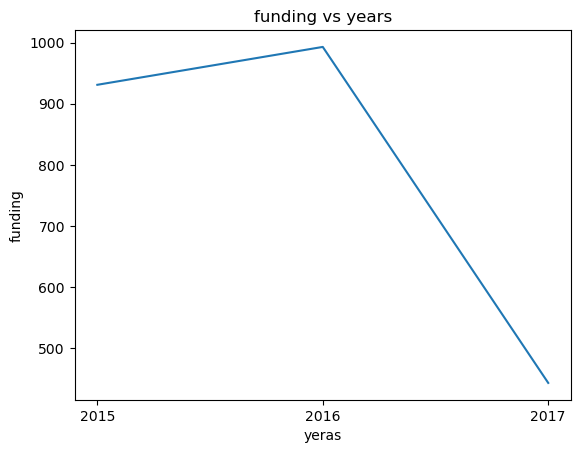

In [5]:
## Question 1
import collections
year=[]
dic={}
for row in data['Date']:
    parts=row.split('/')
    if len(parts)>=3:
        year.append(parts[2])

for i in year:
    if i=='':
        print('adarsh')

for i in year:
    if i in dic:
        dic[i] +=1
    else:
        dic[i]=1
        
for i in dic:
    print(i,dic[i])

xaxis=[]
yaxis=[]
for i in dic:
    xaxis.append(i)
    yaxis.append(dic[i])

del dic['']
print(dic)

dict=collections.OrderedDict(sorted(dic.items()))

plt.plot(dict.keys(),dict.values())
plt.title("funding vs years")
plt.xlabel("yeras")
plt.ylabel('funding')
plt.show()


In [5]:
## Question 2
data['CityLocation']=data['CityLocation'].str.upper()

In [6]:
data['CityLocation']=data['CityLocation'].str.replace("Delhi","New Delhi")
    

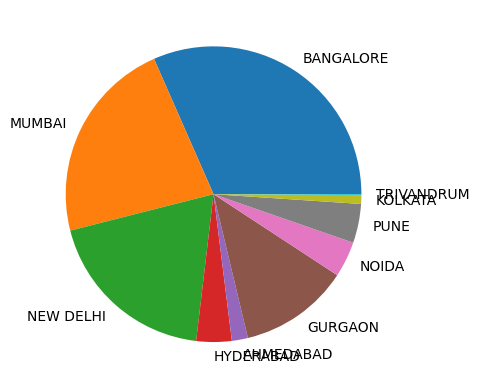

BANGALORE   630
MUMBAI   446
NEW DELHI   382
HYDERABAD   77
AHMEDABAD   35
GURGAON   240
NOIDA   78
PUNE   85
KOLKATA   19
TRIVANDRUM   2


In [73]:
import matplotlib.pyplot as plt 
from itertools import islice
dct={}
city=[]
for row in data['CityLocation']:
    if not pd.isna(row):
        if '/' in row:
           value=row.split('/')
           city.append(value[0])
        if '/' not in row:
            city.append(row)
    
for i in city:
    if i in dct:
        dct[i]+=1
    else:
        dct[i]=1
xaxis=[]
yaxis=[]
for i,value in islice(dct.items(),10):
    xaxis.append(i)
    yaxis.append(dct[i])

plt.pie(yaxis,labels=xaxis,)
plt.show()
for i,value in islice(dct.items(),10):
    print(i," ",value)

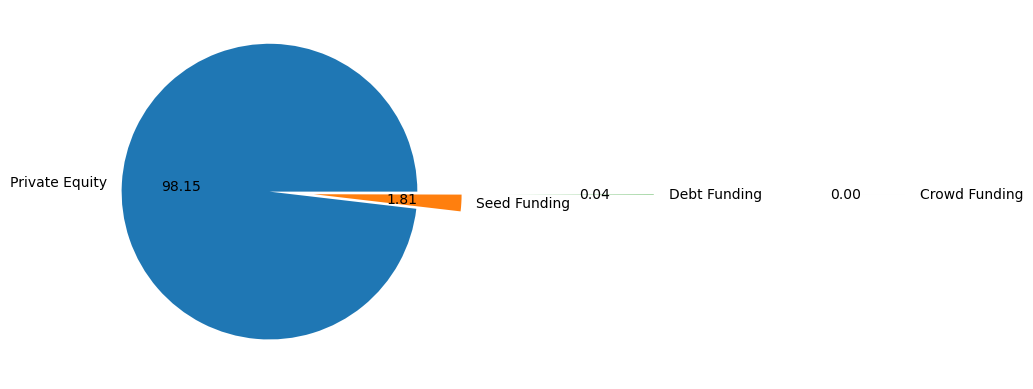

In [170]:
## Question 3
x=data.copy()
x.AmountInUSD.fillna('0',inplace=True)
x.InvestmentType.fillna("",inplace=True)     
x["InvestmentType"].replace('SeedFunding',"Seed Funding",inplace=True)
x['InvestmentType'].replace("PrivateEquity",'Private Equity',inplace=True)
x['InvestmentType'].replace("Crowd funding",'Crowd Funding',inplace=True)

ammountwithC=x.AmountInUSD
Amount=[]
for i in x.AmountInUSD:
    if "," in i:
        t=i.replace(",","")
        Amount.append(int(t))
    else:
        Amount.append(0)

dct={}
for i in range(len(x.InvestmentType)):
    I=x.InvestmentType[i]
    A=Amount[i]
    if i!="":
        if I in dct:
            dct[I] +=A
        else:
            dct[I]=A

        
    
        

dct.pop('')
xaxis=[]
yaxis=[]
for i in dct:
    xaxis.append(dct[i])
    yaxis.append(i)

explode=[0.3,0,1.3,3]
plt.pie(xaxis,labels=yaxis,autopct="%.2f",explode=explode)
plt.show()

In [6]:
##Question 3

In [147]:

import pandas as pd

df=pd.read_csv('startup_funding.csv')
df



,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


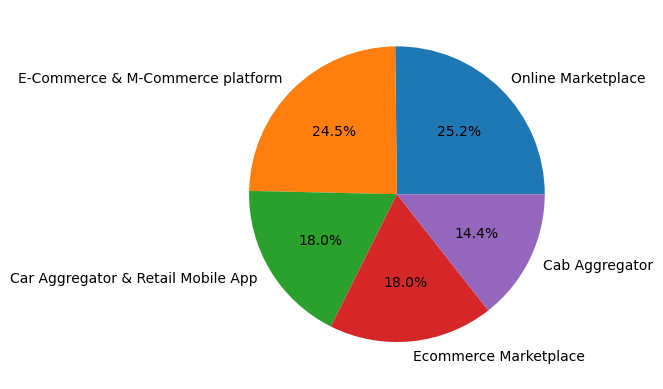

In [148]:
import matplotlib.pyplot as plt
import heapq
df.fillna(str("0"),inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)

industry=[]
Amount=[]

df['AmountInUSD']
for i in df['AmountInUSD']:
    if "," in i:
        t=i.replace(",","")
        Amount.append(int(t))
    else:
        Amount.append(0)
df.IndustryVertical
for i in df.IndustryVertical:
    industry.append(i)


dct={}
for i in range(len(industry)):
    I=industry[i]
    A=Amount[i]
    if i in dct:
        dct[I]+=A
    else:
        dct[I]=A

d={}
d= heapq.nlargest(5, dct.items(), key=lambda x: x[1])

    
xaxis=[]
yaxis=[]
for i in d:
    xaxis.append(i[1])
    yaxis.append(i[0])

plt.pie(xaxis,labels=yaxis,autopct="%2.1f%%")
plt.show()


In [212]:
#Questsion 4
data=pd.read_csv('startup_funding.csv')
data
# data['InvestorsName'].dropna(inplace=True)
# invest=[]
# for i in data['InvestorsName']:
#     invest.append(i)

    
# dct={}
# for i in invest:
#     if i in dct:
#         dct[i]+=1
#     else:
#         dct[i]=1


        

# value=np.max(dct.values())
# value

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [227]:
import pandas as pd
import heapq
data=pd.read_csv('startup_funding.csv')
data['AmountInUSD'].fillna('0',inplace=True)
# data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
# data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
# data['StartupName'].replace('Olacabs','Ola',inplace=True)
# data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
# data['StartupName'].replace('Olacabs','Ola',inplace=True)
# data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
# data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
# data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
# data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
# data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
Amount=[]
data['AmountInUSD']
for i in data['AmountInUSD']:
    if "," in i:
        t=i.replace(",","")
        Amount.append(int(t))
    else:
        Amount.append(0)
sup=[]
for i in data['StartupName']:
    sup.append(i)



d={}
for i in range(len(sup)):
    S=sup[i]
    A=Amount[i]
    if i in d:
        d[S]+=A
    else:
        d[S]=A

max= heapq.nlargest(5, d.items(), key=lambda x: x[1])



In [228]:
max

[('Flipkart.com', 700000000),
 ('Ola', 500000000),
 ('Snapdeal', 500000000),
 ('Olacabs', 400000000),
 ('Paytm Marketplace', 200000000)]

In [245]:
import pandas as pd
import heapq
data=pd.read_csv('startup_funding.csv')
data['AmountInUSD'].fillna('0',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

Amount=[]
data['AmountInUSD']
for i in data['AmountInUSD']:
    if "," in i:
        t=i.replace(",","")
        Amount.append(int(t))
    else:
        Amount.append(0)
sup=[]
for i in data['StartupName']:
    sup.append(i)



d={}
for i in range(len(sup)):
    S=sup[i]
    A=Amount[i]
    if i in d:
        d[S]+=A
    else:
        d[S]=A

max= heapq.nlargest(5, d.items(), key=lambda x: x[1])
